# Testing Johnson-Lindenstrauss Lemma

In [1]:
import numpy as np
import numpy.linalg as LA
import scipy.stats as STS
from matplotlib import pyplot as plt
np.random.seed(10)

In [6]:
def gen_matrix(m,n):
    A = np.zeros((m,n))
    def gen_column():
        ind = np.random.randint(1,5)
        if ind == 1:
            a = np.random.randint(-1000,1)
            b = np.random.randint(1,1000)
            col = STS.uniform.rvs(size=m,loc=a,scale=b-a)
        elif ind == 2:
            a = -10+20*np.random.rand()
            b = 2*np.random.rand()
            col = STS.norm.rvs(size=m,loc=a,scale=b)
        elif ind == 3:
            b=2+2*np.random.rand()
            col = STS.gamma.rvs(a=b,size=m)
        elif ind == 4:
            a = 0.5 + 2*np.random.rand() 
            col = STS.expon.rvs(size=m,scale=a)
        return col
    for i in range(n):
        A[:,i]=gen_column()
        
    return A

In [7]:
A = gen_matrix(4000,2000)

In [8]:
LA.matrix_rank(A) 

2000

In [9]:
def distance(A):  # function to compute the distances between vectors/columns in m-dimension
    n = A.shape[1]
    dist=[]
    for i in range(n):
        u=A[:,i]
        for j in range(i+1,n):
            dist.append(LA.norm(u-A[:,j])**2)
            
    return dist

In [10]:
def JLlemma(A,epsilon):
    (m,n)=A.shape # n vectors lie in m-dimensional space
    k=int(np.ceil(24*np.log(n)/(3*epsilon**2-2*epsilon**3))) # size of lower-dimensional space
    Z=np.random.randn(k,m) #Gaussian random matrix
    rk=1.0/k
    dist=[]
    for i in range(n):
        u=A[:,i]
        for j in range(i+1,n):
            dist.append(rk*LA.norm(Z@(u-A[:,j]))**2) 
            
    return dist

In [11]:
def test_JLlemma(A,epsilon,dist,nexpts):
    npdist = np.array(dist) # dist is the output from the function distance
    JLsum = np.zeros((npdist.shape[0],))
    for i in range(nexpts): # apply the JLlemma nexpts times
        JLsum += np.array(JLlemma(A,epsilon))
    # now compute probability of failure
    ope = 1.0 + epsilon
    ome = 1.0 - epsilon
    dscale = JLsum/(float(nexpts)*npdist)
    return (sum(dscale <= ome) + sum(dscale >= ope))/float(len(dist)), dscale
    
    

In [13]:
failure, scale = test_JLlemma(A,0.2,distance(A),1)
print(failure)

0.0


In [16]:
epsilon=0.2
int(np.ceil(24*np.log(2000)/(3*epsilon**2-2*epsilon**3))) 

1755

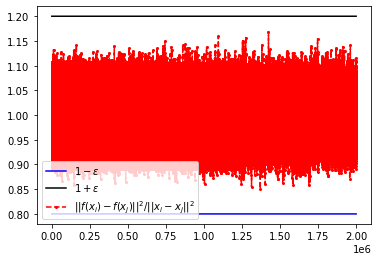

In [17]:
lenS=len(scale)
x=np.linspace(1,lenS,lenS)
import numpy.matlib
y1=np.matlib.repmat(np.array(1-epsilon),lenS,1)
y2=np.matlib.repmat(np.array(1+epsilon),lenS,1)
plt.plot(x,y1,'b-',x,y2,'k-',x,scale,'r.--',markersize=4)
plt.legend(['$1-\epsilon$','$1+\epsilon$','$||f(x_i)-f(x_j)||^2/||x_i - x_j||^2$'],loc='lower left')